In [ ]:
from google.colab import files
uploaded = files.upload()

import os, zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
for fn in uploaded.keys():
    os.rename(fn, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

# Step 2: Download the competition data
!kaggle competitions download -c playground-series-s5e11

# Step 3: Download the dataset “Simulated Roads Accident Data”
!kaggle datasets download -d ianktoo/simulated-roads-accident-data

# Step 4: Unzip them
# Unzip competition
with zipfile.ZipFile("playground-series-s5e11.zip", "r") as z:
    z.extractall("playground-series-s5e11")

# # Unzip the simulated roads accident dataset (it will produce those CSVs)
# with zipfile.ZipFile("simulated-roads-accident-data.zip", "r") as z:
#     z.extractall("simulated-roads-accident-data")

print("✅ Downloaded and extracted competition + simulated roads accident data.")

Saving kaggle.json to kaggle.json
  0% 0.00/19.3M [00:00<?, ?B/s]
100% 19.3M/19.3M [00:00<00:00, 1.28GB/s]
Dataset URL: https://www.kaggle.com/datasets/ianktoo/simulated-roads-accident-data
License(s): CC0-1.0
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 672MB/s]
✅ Downloaded and extracted competition + simulated roads accident data.


In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("playground-series-s5e11/train.csv")

In [67]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [69]:
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [70]:
df['loan_paid_back'].unique()

array([1., 0.])

In [71]:
for obj_col in df.select_dtypes(include='object').columns:
    print(obj_col)
    print(df[obj_col].unique(),'\n')

gender
['Female' 'Male' 'Other'] 

marital_status
['Single' 'Married' 'Divorced' 'Widowed'] 

education_level
['High School' "Master's" "Bachelor's" 'PhD' 'Other'] 

employment_status
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student'] 

loan_purpose
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business'] 

grade_subgrade
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2'] 



In [72]:
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [73]:
df[df['employment_status'] == 'Employed'].describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,450645.000000,450645.000000,450645.000000,450645.000000,450645.000000,450645.000000,450645.000000
mean,297047.858947,48219.161886,0.116399,682.475827,15004.978559,12.325753,0.894145
std,171490.135207,26647.939020,0.065485,55.437994,6914.955629,2.006782,0.307652
min,1.000000,6002.430000,0.011000,395.000000,500.090000,3.320000,0.000000
25%,148576.000000,28019.520000,0.071000,648.000000,10269.980000,10.970000,1.000000
50%,297140.000000,46626.810000,0.094000,684.000000,15001.690000,12.350000,1.000000
75%,445712.000000,60981.320000,0.150000,721.000000,18759.290000,13.640000,1.000000
max,593993.000000,393064.030000,0.577000,849.000000,48959.950000,20.990000,1.000000


In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [75]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [76]:
df1 = df.drop(['id', 'loan_paid_back'], axis=1)
y = df['loan_paid_back']

In [77]:
cat_cols = [c for c in df1.columns if df1[c].dtype == 'object']
cat_cols

['gender',
 'marital_status',
 'education_level',
 'employment_status',
 'loan_purpose',
 'grade_subgrade']

In [78]:
myPipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [79]:
myPipeline.fit_transform(df1[cat_cols])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2469323 stored elements and shape (593994, 49)>

In [80]:
cat_df = pd.DataFrame(myPipeline.fit_transform(df1[cat_cols]).toarray(), columns=myPipeline.get_feature_names_out(), dtype='int8')

In [81]:
cat_df.head()

,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_High School,education_level_Master's,education_level_Other,education_level_PhD,employment_status_Retired,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
final_df = pd.concat([df1.drop(cat_cols, axis=1), cat_df], axis=1)

In [83]:
final_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,29367.99,0.084,736,2528.42,13.67,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,22108.02,0.166,636,4593.10,12.92,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49566.20,0.097,694,17005.15,9.76,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,46858.25,0.065,533,4682.48,16.10,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,25496.70,0.053,665,12184.43,10.21,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
final_df.shape

(593994, 54)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.15, random_state=42)

In [87]:
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8873063973063973

In [88]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9042760942760942

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:17:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


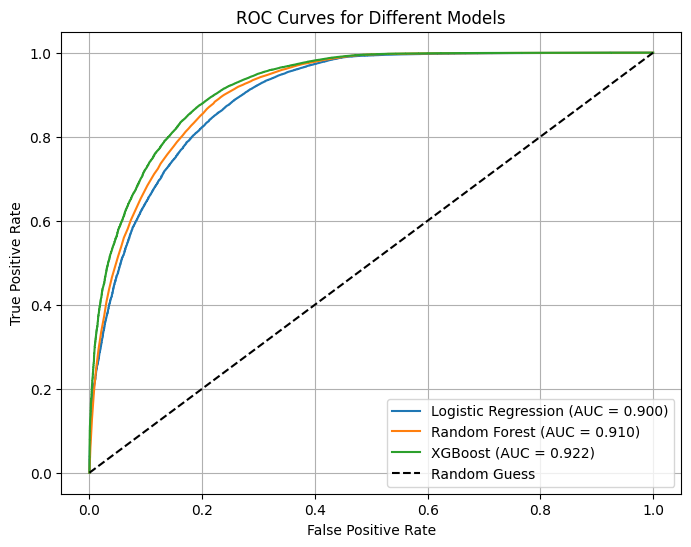

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.grid(True)
plt.show()

In [90]:
test_df = pd.read_csv("playground-series-s5e11/test.csv")

In [91]:
test_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [92]:
test_df1 = test_df.drop('id', axis=1)

In [93]:
test_cat_df = pd.DataFrame(myPipeline.transform(test_df1[cat_cols]).toarray(), columns=myPipeline.get_feature_names_out(), dtype='int8')

In [94]:
test_cat_df.head()

,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_High School,education_level_Master's,education_level_Other,education_level_PhD,employment_status_Retired,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
test_final_df = pd.concat([test_df1.drop(cat_cols, axis=1), test_cat_df], axis=1)

In [96]:
xgb.predict(test_final_df)

array([1, 1, 0, ..., 1, 1, 1])

In [97]:
xgb.predict_proba(test_final_df)

array([[0.05946058, 0.9405394 ],
       [0.02298427, 0.97701573],
       [0.6068975 , 0.39310256],
       ...,
       [0.02399862, 0.9760014 ],
       [0.01444787, 0.98555213],
       [0.09000784, 0.90999216]], dtype=float32)

In [98]:
test_df['id'].shape

(254569,)

In [99]:
xgb.predict_proba(test_final_df).shape

(254569, 2)

In [100]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'loan_paid_back': models['XGBoost'].predict_proba(test_final_df)[:, 1]
})

In [101]:
submission_df.head()

,id,loan_paid_back
0,593994,0.940539
1,593995,0.977016
2,593996,0.393103
3,593997,0.940388
4,593998,0.966151


In [102]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
!pwd

/content
